C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression MAE: 4181.194473753649
Linear Regression RMSE: 5796.284659276272
Linear Regression R^2: 0.7835929767120724
Random Forest MAE: 2550.0784706115096
Random Forest RMSE: 4576.299916157115
Random Forest R^2: 0.8651034329144947


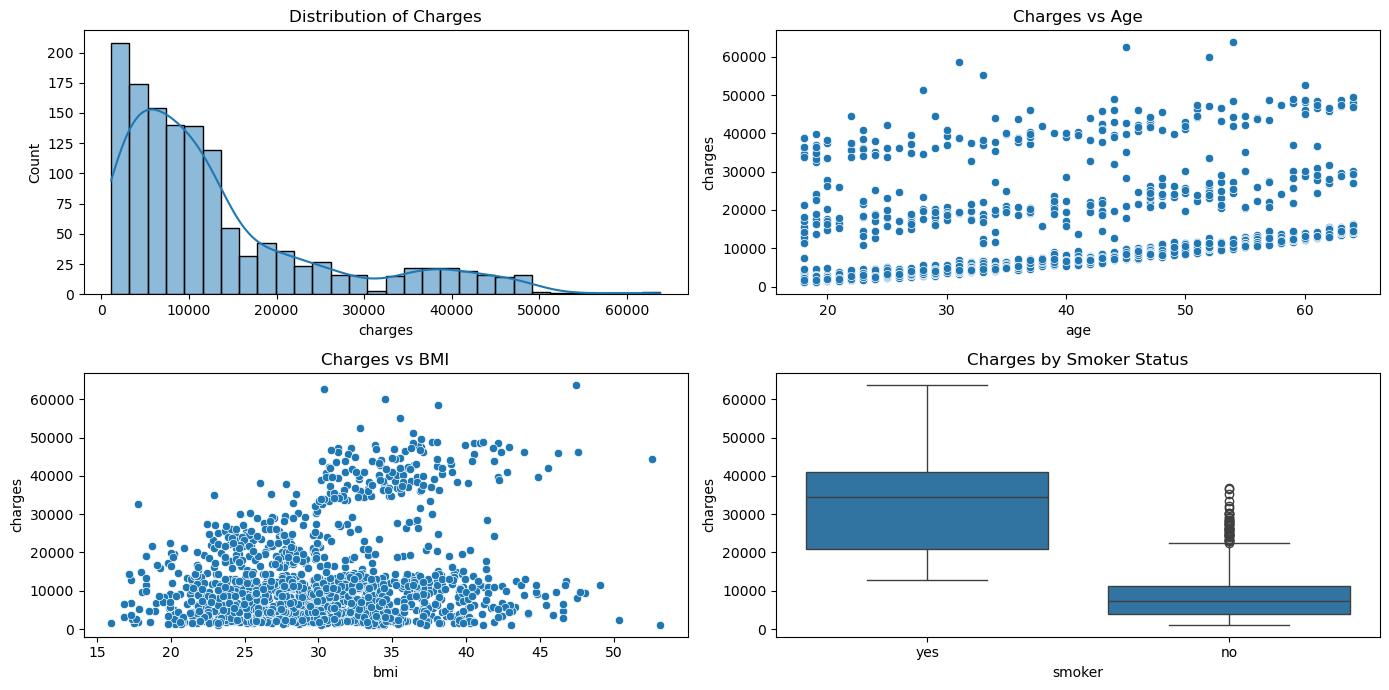

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('G:/TOP-MENTOR/FILES/August 25th/Assignment/Regression Assignment/insurance.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split data into features and target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Initialize and train Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

# Evaluate Random Forest model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2:", lr_r2)

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2:", rf_r2)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(14, 7))

# Distribution of charges
plt.subplot(2, 2, 1)
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')

# Relationship between Age and Charges
plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Charges vs Age')

# Relationship between BMI and Charges
plt.subplot(2, 2, 3)
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Charges vs BMI')

# Charges by Smoker Status
plt.subplot(2, 2, 4)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')

plt.tight_layout()
plt.show()